#### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Homework 5
### Due: Monday, Feb 28th at 11.00am CST

The completed lecture notebook must also be submitted by 11:00am Central Time on Feb 28th.

---

## Problem 1

We have seen that for some distributions, we can solve the for the maximum liklehood analytically.

a) Solve analytically for the maximum liklihood of the Poisson distribution.

b) Solve analytically for the maximum likelihood for a Gaussian where the uncertainties are *hetero*scedastic.

Either write your solution as Markdown/Latex below, or paste in a scanned image of your handwritten solution.

### Solution

#### Part A:

The probability density function for a certain value x in a Poisson distribution is given by the following:

$$p(x|\lambda) = \frac{\lambda^{x}e^{-\lambda}}{x!}$$

I can construct the likelihood function for the MLE by computing the product of the probabilities for each data point.

$$L\equiv p(\{x_i\}|M(\theta)) = \prod_{i=1}^N p(x_i|M(\theta))$$

M is the model and $\theta$ collectively refers to the model parameter(s).

Now, I will combine the above equations to write L out as

$$L = \prod_{i=1}^N \frac{\lambda^{x_i}e^{-\lambda}}{x_i!}$$

Likelihoods can be very small, so I will define the log-likelihood function as $\ln L = \ln[L(\theta)]$.

$$\ln L = \sum_{i=1}^N \ln\left[\frac{\lambda^{x_i}e^{-\lambda}}{x_i!}    \right]$$

$$\ln L = \sum_{i=1}^N \left[\ln(\lambda^{x_i}) + \ln(e^{-\lambda}) - \ln({x_i!})\right]$$

$$\ln L = \sum_{i=1}^N \left[x_i\ln(\lambda) -\lambda - \ln({x_i!})\right]$$

Next, I will split each summation and factor out constants.

$$\ln L = -N\lambda + \ln(\lambda)\sum_{i=1}^N x_i - \sum_{i=1}^N \ln(x_i!)$$

I can determine the maximum of this function by setting the derivative of $\ln L$ equal to 0.

$$\frac{d \ln L(\lambda)}{d\lambda} \equiv 0$$

The derivative is

$$\frac{d \ln L(\lambda)}{d\lambda} = -N + \frac{1}{\lambda}\sum_{i=1}^N x_i$$

The last term does not contain $\lambda$ and is therefore treated as a constant.

Next, I will set the derivative equal to 0.

$$-N + \frac{1}{\lambda}\sum_{i=1}^N x_i = 0$$

Solving for $\lambda$, I get that

$$\frac{1}{\lambda}\sum_{i=1}^N x_i = N$$

$$\sum_{i=1}^N x_i = N\lambda$$

$$\lambda = \frac{1}{N}\sum_{i=1}^N x_i$$

This is equivalent to the sample arithmetic mean of all the measurements.

To check that this is indeed a maximum, I will also compute the second derivative.

$$\frac{d^2 \ln L(\lambda)}{d^2\lambda} = \frac{-1}{\lambda^2}\sum_{i=1}^N x_i$$

The nature of a Poisson distribution is that values are nonnegative. This means that the multiplier will be positive while the multiplicand is negative. The second derivative will therefore be negative. The second derivative test tells me that what I computed above is indeed a maximum.

#### Part B:

The probability density function for a certain value x in a Gaussian distribution is given by the following:

$$p(x|\mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}\exp \left( \frac{-(x-\mu)^2}{2\sigma^2}     \right)    $$

I can construct the likelihood function for the MLE by computing the product of the probabilities for each data point.

$$L\equiv p(\{x_i\}|M(\theta)) = \prod_{i=1}^N p(x_i|M(\theta))$$

M is the model and $\theta$ collectively refers to the model parameters $\mu$ and $\sigma$

Now, I will combine the above equations to write L out as

$$L = \prod_{i=1}^N \frac{1}{\sigma_i\sqrt{2\pi}}\exp \left( \frac{-(x_i-\mu)^2}{2\sigma_i^2}     \right)$$

I use $\sigma_i$ because the uncertainties are heteroscedastic. This means that measurements have different uncertainties from each other.

Likelihoods can be very small, so I will define the log-likelihood function as $\ln L = \ln[L(\theta)]$. Constant terms have the same effect for all model parameters, so they can be ignored.

$$\ln L = -\frac{1}{2}\sum_{i=1}^N \ln\sigma_i^2- \sum_{i=1}^N \left[ \frac{(x_i-\mu)^2}{2\sigma_i^2}   \right]
$$

I can determine the maximum $\mu$ of this function by setting the derivative of $\ln L$ with respect to $\mu$ equal to 0.

$$\frac{d \ln L(\mu)}{d\mu} \equiv 0$$

The derivative is

$$\frac{d \ln L(\mu, \sigma)}{d\mu} = \sum_{i=1}^N \left[ \frac{(x_i-\hat{\mu})}{\sigma_i^2} \right]$$

Next, I will set this derivative equal to 0.

$$ \sum_{i=1}^N \left[ \frac{(x_i-\hat{\mu})}{\sigma_i^2} \right] = 0 $$

$$ \hat{\mu} = \frac{\sum_{i=1}^N \frac{1}{\sigma_i^2}x_i}{\sum_{i=1}^N \frac{1}{\sigma_i^2}} $$

When all errors are equal, this reduces so that $\hat{\mu}$ is equal to the arithmetic sample mean. However, this data has heteroskedastic uncertainties, so this is not the case.

To check that this is indeed a maximum, I will also compute the second derivative.

$$\frac{d^2 \ln L(\mu)}{d^2\mu} = \sum_{i=1}^N \left[ \frac{-1}{\sigma_i^2} \right]$$

$\sigma^2$ will always be positive, so the value of the second derivative will be the sum of negative numbers, which is negative. The second derivative test tells me that what I computed above is indeed a maximum.

## Problem 2

In the lecture we have seen how data sets influenced by outliers can be fitted better when using the Huber loss function.
Another way to deal with outliers is called Winsorizing or winsorization and implemented in scipy (from scipy.stats.mstats import winsorize).
a) using the scipy online documentation, look up what this method means and write a small Python example.
b try to fit the data from our lecture, section "Fitting A Straight Line To Data", after applying Winsorizing, and describe 



### Solution



In [48]:
# Part a - Using the scipy online documentation, look up what this method means and write a small Python example.

import numpy as np
from scipy.stats.mstats import winsorize
from scipy import optimize
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
from astroML.datasets import fetch_hogg2010test

# The winsorize function limits extreme values to attempt to reduce the effect of outliers. 
# The function accepts a tuple argument (limits) that gives lower and upper percentiles for values to cut on each side
# of the passed array. The limits[0]th lowest values are set to the limits[0]th percentile, and the limits[1]th 
# highest values are set to the limits[1]th percentile.

# Initialize a random array
arr = np.random.randint(0, 100, 20)
print(f'Original Array: \n{arr}\n')

# Use winsorize to cut out 10% of the lowest values and 10% of the highest values
winsor_10 = winsorize(arr, limits=[0.1, 0.1])
print(f'Winsorized array with 10% of lowest and highest values replaced:\n{winsor_10}\n')

# Use winsorize to cut out 20% of the lowest values and 20% of the highest values
winsor_10 = winsorize(arr, limits=[0.2, 0.2])
print(f'Winsorized array with 20% of lowest and highest values replaced:\n{winsor_10}\n')

Original Array: 
[ 9 23 95  9 55 47  3 39 71 29 88 60 12 82 26 18  1 16 66 66]

Winsorized array with 10% of lowest and highest values replaced:
[ 9 23 82  9 55 47  9 39 71 29 82 60 12 82 26 18  9 16 66 66]

Winsorized array with 20% of lowest and highest values replaced:
[12 23 66 12 55 47 12 39 66 29 66 60 12 66 26 18 12 16 66 66]



In [79]:
# Part b - Fit the data from lecture section "Fitting A Straight Line To Data" after applying Winsorizing
# and describe

# I sourced most of this code from the lecture notebook and added winsorizing!

# Fetch data
data = fetch_hogg2010test()
x = data['x'] 
y = data['y'] 
dy = data['sigma_y']

# Winsorize the values
winsor_x = winsorize(x, limits=[0.15, 0.15])
winsor_y = winsorize(y, limits=[0.15, 0.15])

# Define the standard squared-loss function
def squared_loss(m, b, x, y, dy):
    y_fit = m * x + b
    return np.sum(((y - y_fit) / dy) ** 2, -1)

# Fit that does not include outliers
f_squared = lambda beta: squared_loss(beta[0], beta[1], 
                                      x=x[4:], y=y[4:], 
                                      dy=dy[4:])

# Fit that includes outliers
f_squared_outlier = lambda beta_outlier: squared_loss(beta_outlier[0], 
                                                      beta_outlier[1], 
                                                      x=x, y=y, dy=dy)

# Fit that includes outliers and uses winsorized data
f_squared_winsor = lambda beta_winsor: squared_loss(beta_winsor[0], 
                                                    beta_winsor[1], 
                                                    x=winsor_x, y=winsor_y, dy=dy)

# Compute maximum likelihoods
beta0 = (1, 30)
beta_squared = optimize.fmin(f_squared, beta0)
beta_squared_outlier = optimize.fmin(f_squared_outlier, beta0)
beta_squared_winsor = optimize.fmin(f_squared_winsor, beta0)

Optimization terminated successfully.
         Current function value: 18.680770
         Iterations: 53
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: 289.963723
         Iterations: 70
         Function evaluations: 133
Optimization terminated successfully.
         Current function value: 81.941044
         Iterations: 66
         Function evaluations: 128


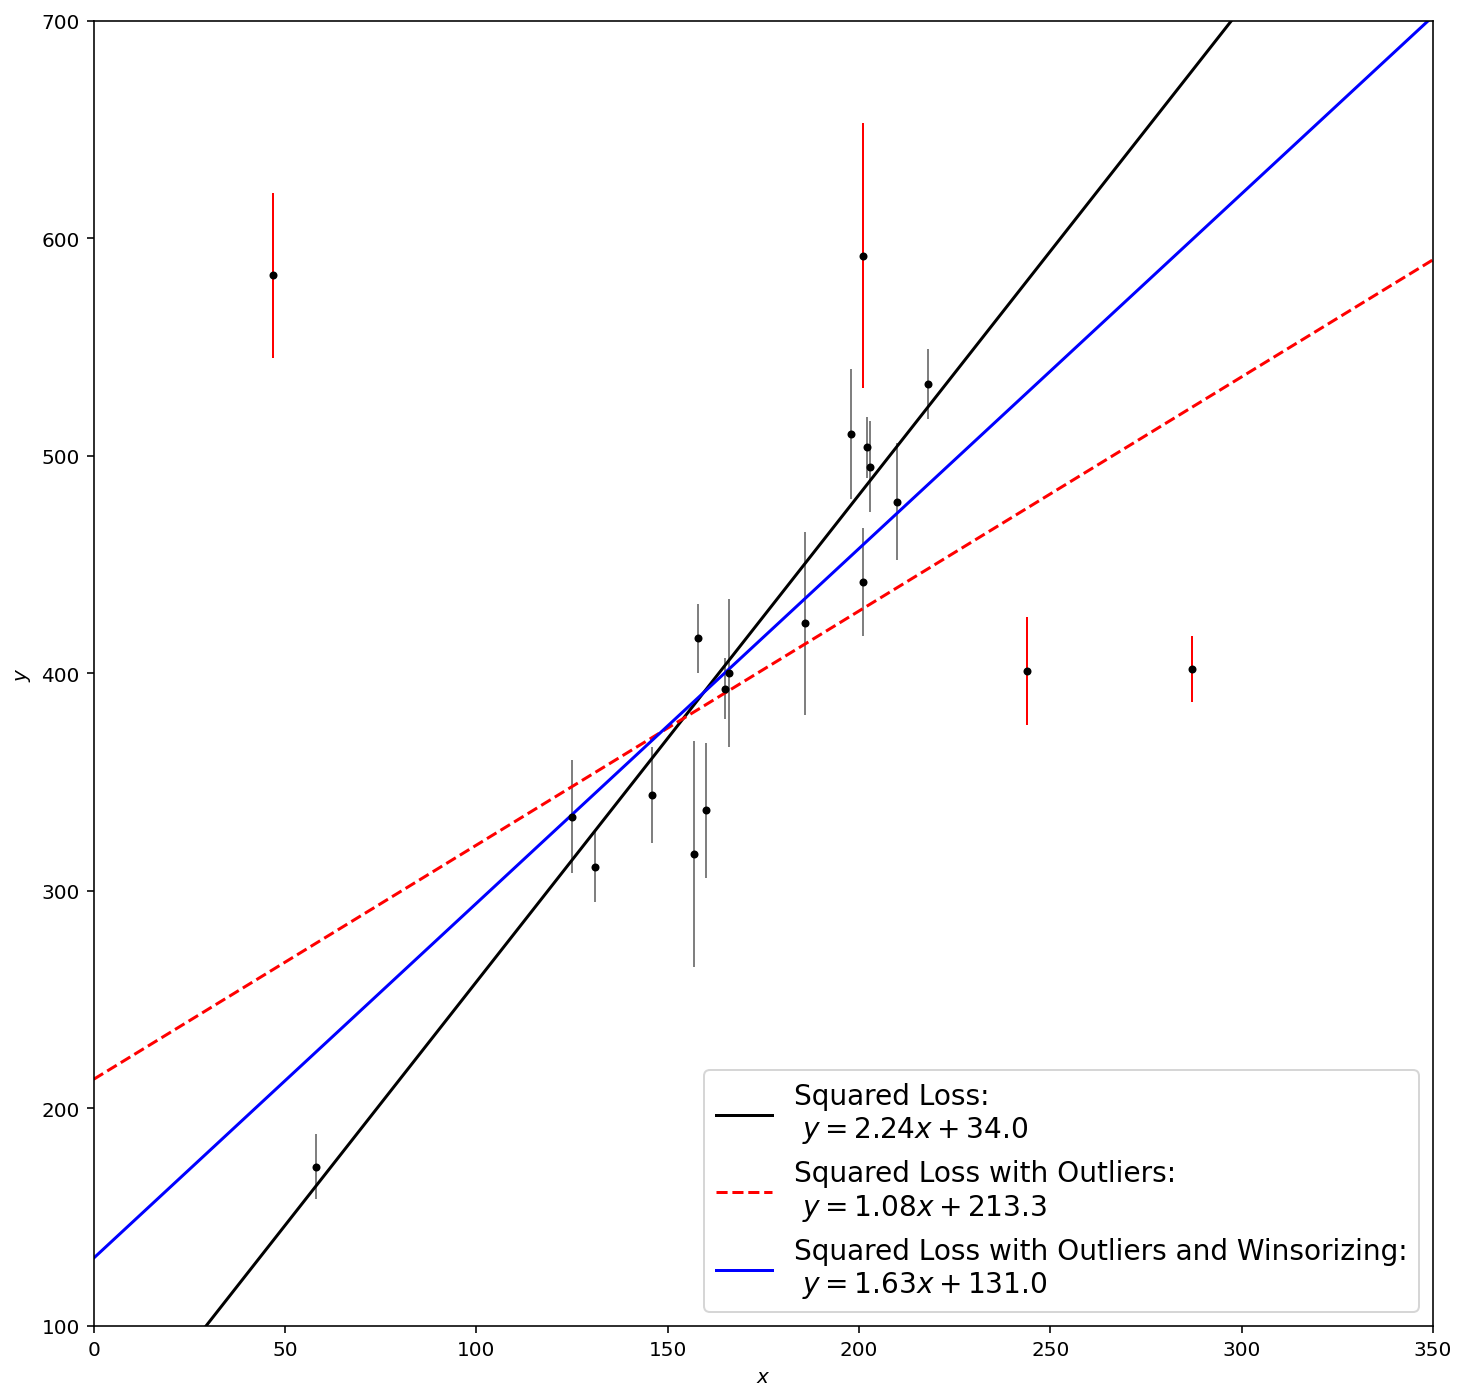

In [83]:
# Plot the results
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)

# Plot the data without outliers in gray
ax.errorbar(x[4:], y[4:], dy[4:], 
            fmt='.k', lw=1, ecolor='gray')

# Plot the outliers in red
ax.errorbar(x[0:4], y[0:4], dy[0:4], 
            fmt='.k', lw=1, ecolor='red')

x_fit = np.linspace(0, 350, 10)

# Plot the fit without outliers in black
ax.plot(x_fit, beta_squared[0] * x_fit + beta_squared[1], 
        color='k',
        label="Squared Loss:\n $y=%.2fx + %.1f$" % tuple(beta_squared))

# Plot the fit that includes outliers in red
ax.plot(x_fit, beta_squared_outlier[0] * x_fit + beta_squared_outlier[1],
        ls='--', color='red',
        label="Squared Loss with Outliers:\n $y=%.2fx + %.1f$" % tuple(beta_squared_outlier))

# Plot the winsorized fit in blue
ax.plot(x_fit, beta_squared_winsor[0] * x_fit + beta_squared_winsor[1],
        color='blue',
        label="Squared Loss with Outliers and Winsorizing:\n $y=%.2fx + %.1f$" % tuple(beta_squared_winsor))

ax.set_xlim(0, 350)
ax.set_ylim(100, 700)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend(loc=4, prop=dict(size=14))

plt.show()

Though not perfect, the data that has been winsorized does appear to have a closer fit to the non-outlier data than the squared loss fit with outliers. I winsorized each dimension (x and y) so that values below the 15th percentile were reassigned to the 15th percentile value and values above the 85th percentile were reassigned to the 85th percentile value. The blue line is significantly closer to the black line than the red dashed line is, so it appears that winsorizing was successful in reducing the impact of outliers to an extent.

Something I noticed is that winzoring can cut out non-outlier points and miss actual outliers altogether depending on where the points fall in the data. For example, the non-outlier point at (58, 173) was changed to (131, 344). None of the outliers were missed in this example, but consider a point (130, 508). The point would probably be considered an outlier, but winsorizing would leave it unchanged. While these sources of error were minimal in this example, they may prove disastrous in other data sets. It seems important to completely understand the data and how it might change before winsorizing (or performing outlier removal in general).